<a href="https://colab.research.google.com/github/mrmaggoo1/MAT421/blob/main/Module_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

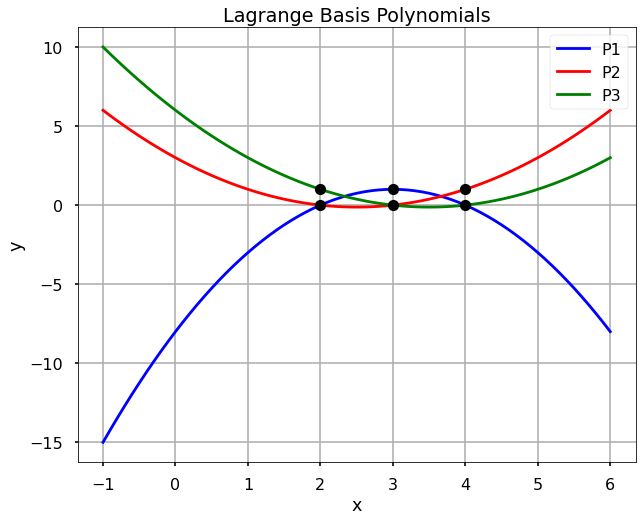

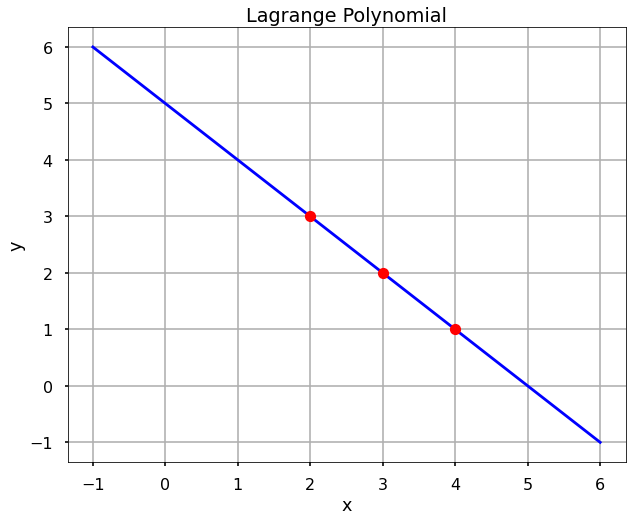

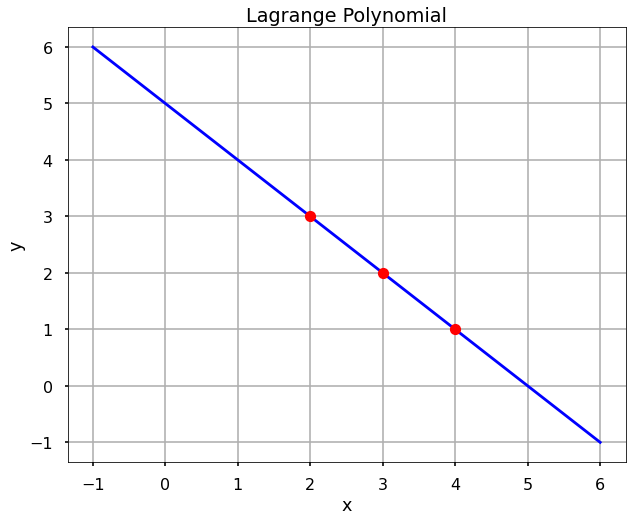

In [10]:
# HW B PT 2 Sections 17.4 and 17.5

# Section 17.4: Lagrange Polynomial Interpolation
# lagrange interpolation finds a single polynomial that goes thru all data points

# P1: Lagrange Example
# Create a linear combination of Lagrange Polynomials Pi(x) and plot each basis polynomial then find the single lagrange polynomial

# import array processing package 'numpy'
import numpy as np
# The Polynomial class provides the standard Python numerical methods
import numpy.polynomial.polynomial as poly
# import plotting library with MATLAB-like interface
import matplotlib.pyplot as plt
# seaborn is a statistical library used for plotting that adds visuale effects to plots to help with analyses. 
plt.style.use('seaborn-poster')

# Data Set:
#  x = [0,1,2] ; y = [1,3,2]
# Langrange Basis Polynomials:
#  P1(X) = ((X-X2)(X-X3))/((X1-X2)(X1-X3)) = ((X-4)(X-2))/((3-4)(3-2)) =-x^2+6x-8
#  P2(X) = ((X-X1)(X-X3))/((X2-X1)(X2-X3)) = ((X-3)(X-2))/((4-3)(4-2)) = 0.5*x^2 - (5/2)*x+3
#  P3(X) = ((X-X1)(X-X2))/((X3-X1)(X3-X2)) = ((X-3)(X-4))/((2-3)(2-4)) = 0.5*x^2-(7/2)*x+6

# Create x and y matrices from given data set
x = [3,4,2]
y = [2,1,3]
# Input coeff. of each Pi(x) 
P1_coeff = [-8,6,-1]
P2_coeff = [3,-5/2,0.5]
P3_coeff = [6,-7/2,0.5]
# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)
# Returns an array with evenly spaced elements as per the interval
x_new = np.arange(-1.0,6.1,0.1)  # np.arrage(start, stop, stepsize)

# plot polynomials and points
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# compute and plot the lagrange polynomial using sum of y coeff * Pi(x). 
L = 2*P1 + P2 + 3*P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Use lagrange function to directly interpolate data
from scipy.interpolate import lagrange
# call lagrange and input x,y data sets
f = lagrange(x,y)
# plot
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


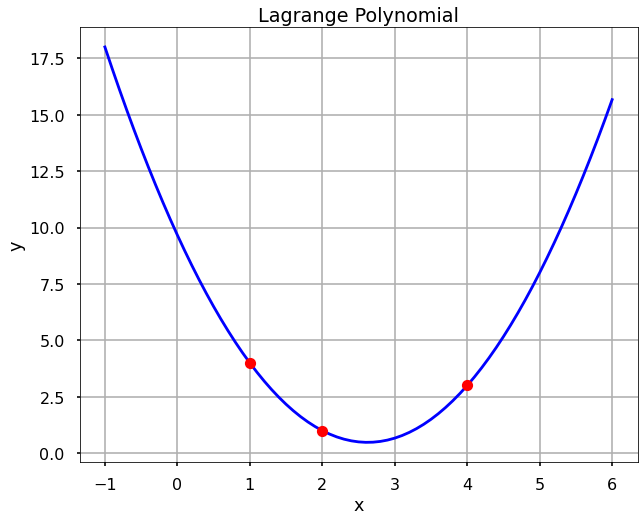

In [13]:
# P2: Exampe 2 use lagrange function to find lagrange polynomial
# Use lagrange function to directly interpolate data
from scipy.interpolate import lagrange
# input data sets
x = [4,1,2]
y = [3,4,1]

# call lagrange and input x,y data sets
f = lagrange(x,y)
# plot
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
# Section 17.5:P Newtonian Polynomial Interpolation
# Another method to fit a set of data points using interpolation


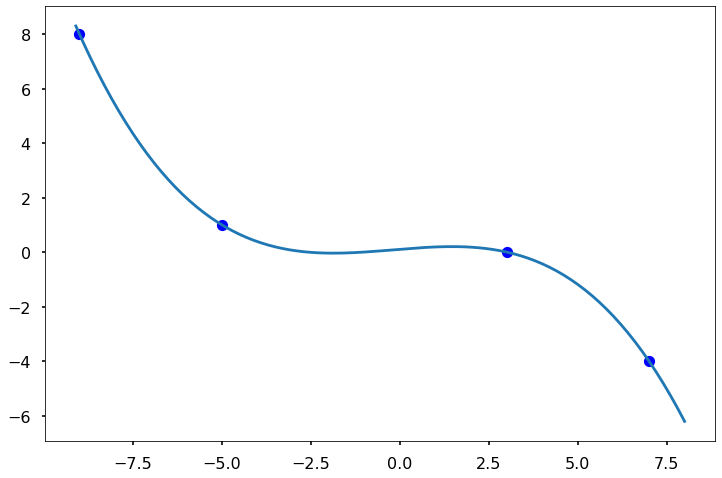

In [18]:
# P3: Newtonian Interpolation
# import array processing package 'numpy'
import numpy as np
# import plotting library with MATLAB-like interface
import matplotlib.pyplot as plt
# seaborn is a statistical library used for plotting that adds visuale effects to plots to help with analyses. 
plt.style.use('seaborn-poster')

# Magic function: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline

# define function for divided differences
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

# define function for newtonian polynomial
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

# create data sets
x = np.array([7,-5,3,-9])
y = np.array([-4,1,0,8])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-9.1, 8.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)